In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(135deg, #1e3a8a, #4f46e5); text-align: right;"> سوال 1 آمار توصیفی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [2]:
df = pd.read_excel('df_q1.xlsx')
df.head()


,age,relation,degree,occupationalst
0,66,Head,Diploma,IncomeWOJob
1,61,Spouse,College,IncomeWOJob
2,36,Head,Elemantry,employed
3,33,Spouse,Secondary,Housewife
4,12,Child,Elemantry,Student


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515659 entries, 0 to 515658
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             515659 non-null  int64 
 1   relation        515659 non-null  object
 2   degree          399598 non-null  object
 3   occupationalst  438347 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.7+ MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> یافتن مقادیر گمشده </div>


In [6]:
df.isnull().sum()


age                    0
relation               0
degree            116061
occupationalst     77312
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> هندل کردن مقادیر گمشده </div>


In [7]:
df['degree'].fillna('Unknown', inplace=True)
df['occupationalst'].fillna('Unknown', inplace=True)


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> ایجاد گروه های سنی برای رسم بهتر توزیع </div>


In [8]:
age_bins = [0, 18, 30, 50, 65, 100]
age_labels = ['Under 18', '18-30', '31-50', '51-65', 'Above 65']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

df.head()


,age,relation,degree,occupationalst,age_group
0,66,Head,Diploma,IncomeWOJob,Above 65
1,61,Spouse,College,IncomeWOJob,51-65
2,36,Head,Elemantry,employed,31-50
3,33,Spouse,Secondary,Housewife,31-50
4,12,Child,Elemantry,Student,Under 18


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> رسم نمودار توزیع سن </div>


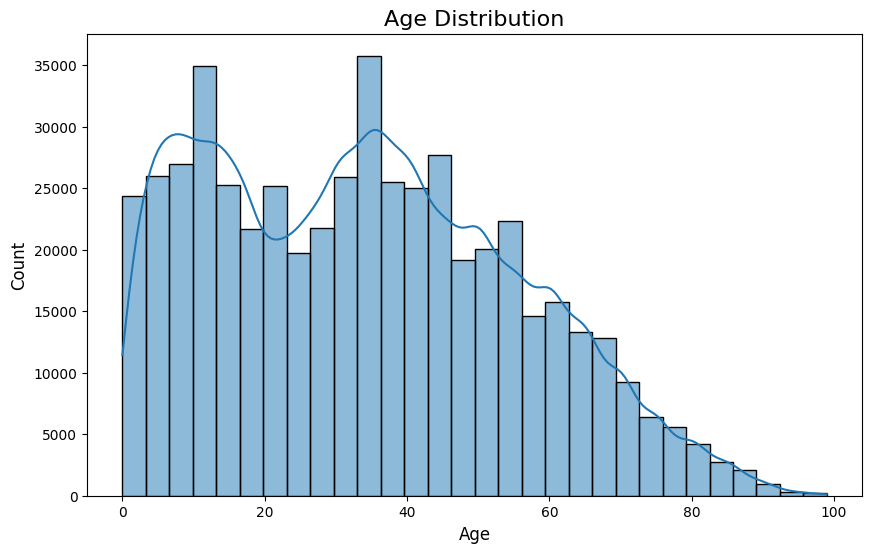

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> رسم نمودار توزیع میزان تحصیلات </div>


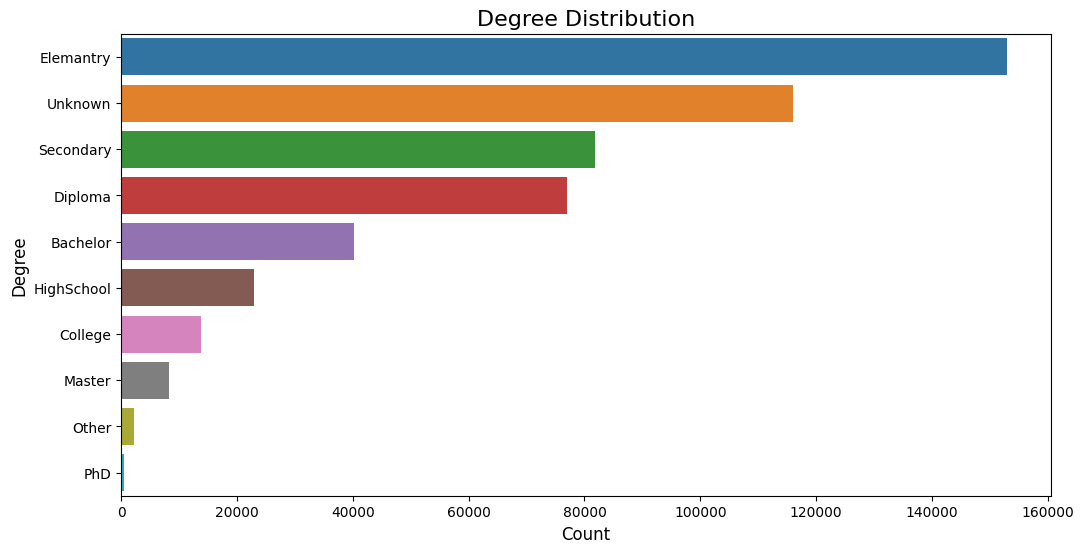

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='degree', data=df, order=df['degree'].value_counts().index)
plt.title('Degree Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Degree', fontsize=12)
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> رسم نمودار توزیع بستگی با سرپرست </div>


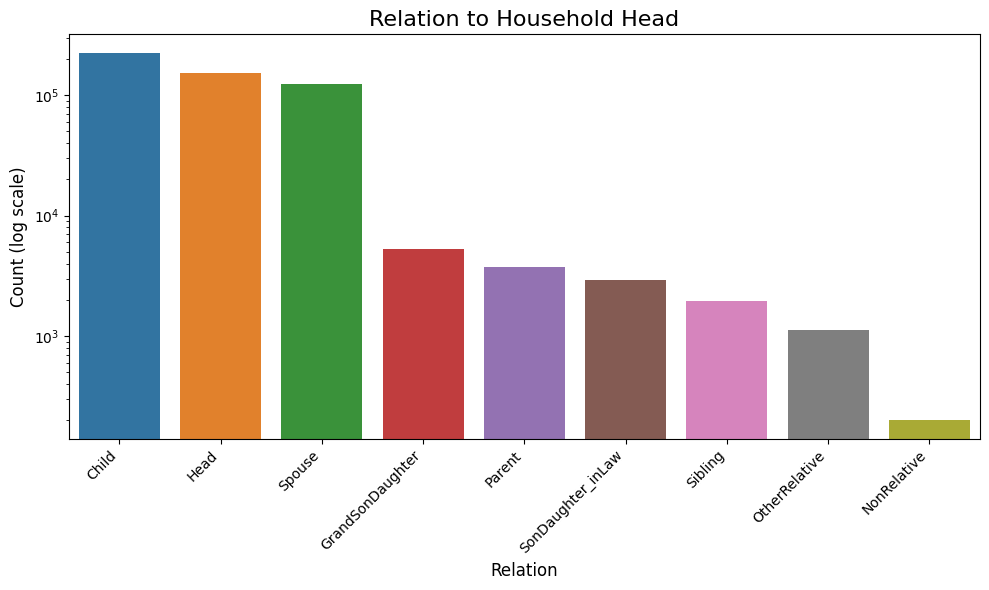

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='relation', data=df, order=df['relation'].value_counts().index)
plt.yscale('log')
plt.title('Relation to Household Head', fontsize=16)
plt.xlabel('Relation', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> رسم نمودار توزیع وضعیت فعالیت </div>


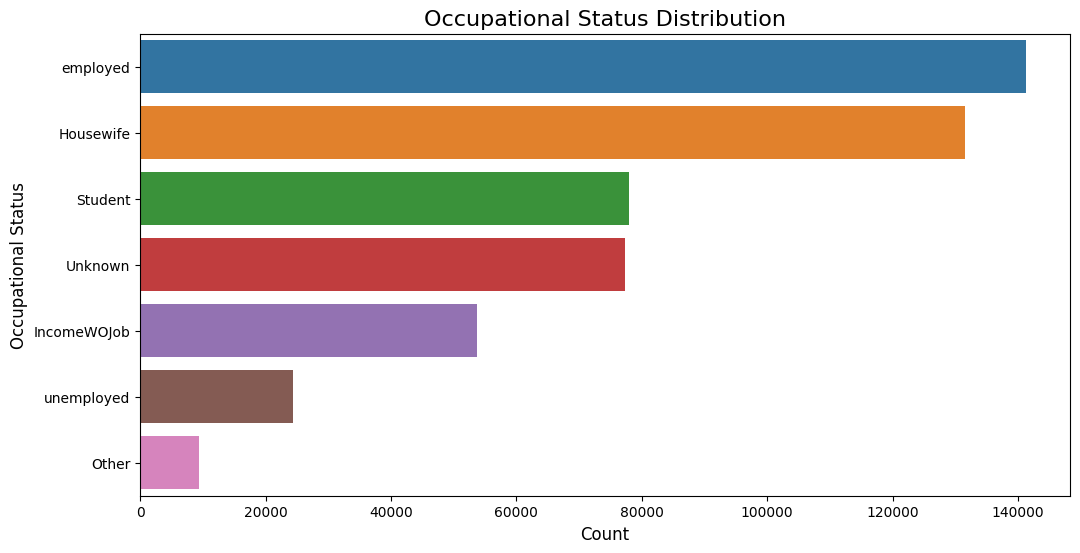

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y='occupationalst', data=df, order=df['occupationalst'].value_counts().index)
plt.title('Occupational Status Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupational Status', fontsize=12)
plt.show()
